In [1]:
import numpy as np
import PIL
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [65]:
def load_image(input_image):

    image = Image.open(input_image)
    image_data = np.array(image, dtype='float32')
    image_shape = image_data.shape
    image_data /= 255
    image_data = image_data.reshape(image_data.shape[0]*image_data.shape[1],image_data.shape[2])
    return image_data, image_shape

In [3]:
def kMeansInitCentroids(image_data,K):
    
    centroids = np.zeros((K,image_data.shape[1]))
    random_data = np.random.permutation(image_data)
    centroids = random_data[0:K,:]
    return centroids

In [4]:
def findClosestCentroids(image_data,K,centroids):
    
    image_data_len = image_data.shape[0]
    data_centroids = np.zeros((image_data_len,1))
    dist = np.zeros((K,1))
    
    for i in range(image_data_len):
        dist = np.linalg.norm(image_data[i] - centroids,axis=-1)
        data_centroids[i] = np.argmin(dist)

    return data_centroids

In [5]:
def computeMeanCentroids(image_data,data_centroids,centroid_shape,K):
    
    centroids = np.zeros(centroid_shape)
    for i in range(K):
        data_mask = data_centroids == i
        total_mask = data_mask.sum()
        centroids[i] = np.sum(image_data * data_mask, axis=0)/total_mask
    
    return centroids

In [ ]:
def computeError(image_data,centroids,data_centroids):
    
    image_data_len = image_data.shape[0]
    error_list = np.zeros((image_data_len,1))
    for i in range(image_data_len):
        error_list[i] = np.linalg.norm(image_data[i] - centroids[data_centroids[i].astype(int)],axis=-1)
    
    error = np.mean(error_list)
    return error

In [74]:
def kMeanClustering(image_data,K=16,max_iter=10,log_cluster_iter=False):
    
    centroids = kMeansInitCentroids(image_data,K)
    data_centroids = np.zeros(image_data.shape)
    errors = []
    
    if log_cluster_iter:
        print('Clustering Start')
        
    for i in range(max_iter):
        data_centroids = findClosestCentroids(image_data,K,centroids)
        errors.append(computeError(image_data,centroids,data_centroids))
        centroids = computeMeanCentroids(image_data,data_centroids,centroids.shape,K)

    if log_cluster_iter:
        print('Clustering End')
    
    return centroids, data_centroids, errors

In [ ]:
image = Image.open('parrotx.jpg')
image_data, image_shape = load_image('parrotx.jpg')

centroids_list = []
error_list = []
data_centroids_list = []

for i in range(6,20):
    centroids, data_centroids, error = kMeanClustering(image_data,i)
    centroids_list.append(centroids)
    data_centroids_list.append(data_centroids)
    error_list.append(error)
    print('#',end=' ')
    


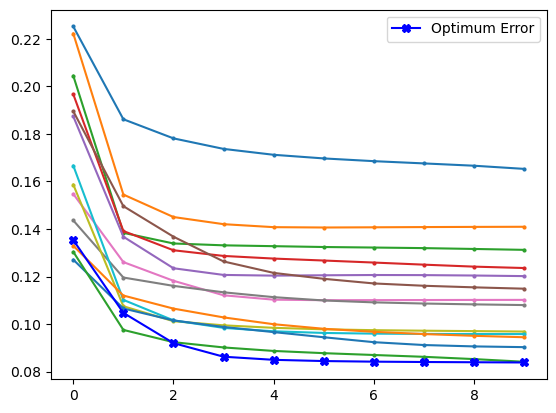

K =  18


In [117]:
error_vals = []
for i in range(6,20):
    error_vals.append(error_list[i-6][9])

optimum_err_idx = np.argmin(error_vals)
error_iter = np.arange(0,10,1)
error_iter.shape

for i in range(6,20):
    if (i-6) == optimum_err_idx:
        continue;
    plt.plot(error_iter,error_list[i-6],marker='o',markersize=2)

plt.plot(error_iter,error_list[optimum_err_idx],marker='X',c='blue',markersize=6,label='Optimum Error')    
plt.legend()
plt.show()

print("K = ",optimum_err_idx+6)

# # # # # # # # # # 
Optimum Error =  0.08174395554210559


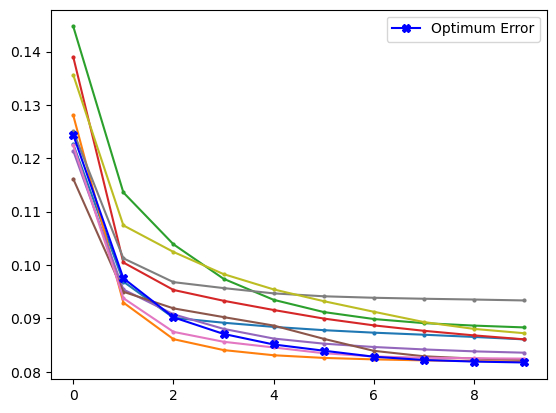

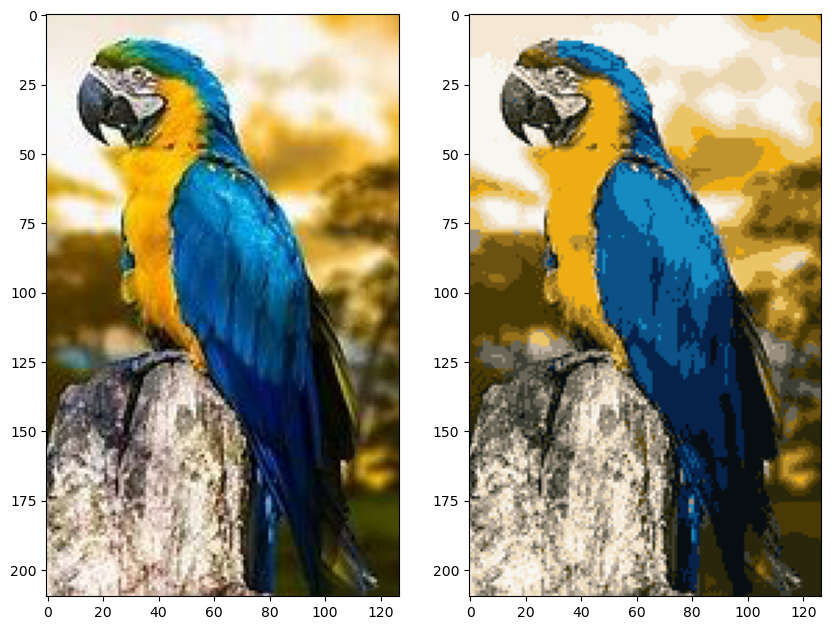

In [118]:
image = Image.open('parrotx.jpg')
image_data, image_shape = load_image('parrotx.jpg')

centroids_list = []
error_list = []
data_centroids_list = []

for i in range(10):
    centroids, data_centroids, error = kMeanClustering(image_data,18)
    centroids_list.append(centroids)
    data_centroids_list.append(data_centroids)
    error_list.append(error)
    print('#',end=' ')
    
error_vals = []
for i in range(10):
    error_vals.append(error_list[i][9])

optimum_err_idx = np.argmin(error_vals)
optimum_error = error_list[optimum_err_idx]
error_iter = np.arange(0,10,1)

centroids = centroids_list[optimum_err_idx]
data_centroids = data_centroids_list[optimum_err_idx]

print('\nOptimum Error = ',optimum_error[9])

for i in range(10):
    if i == optimum_err_idx:
        continue;
    plt.plot(error_iter,error_list[i],marker='o',markersize=2)

plt.plot(error_iter,error_list[optimum_err_idx],marker='X',c='blue',markersize=6,label='Optimum Error')    
plt.legend()
plt.show()

compressed_image_data = np.zeros(image_data.shape)

for i in range (image_data.shape[0]):
    compressed_image_data[i] = centroids[data_centroids[i].astype(int)] * 255

compressed_image_data = compressed_image_data.reshape(image_shape)
compressed_image = Image.fromarray(compressed_image_data.astype(np.uint8),'RGB')


fig, axs = plt.subplots(1,2,figsize=(10, 12))
axs[0].imshow(image)
axs[1].imshow(compressed_image)
plt.show()

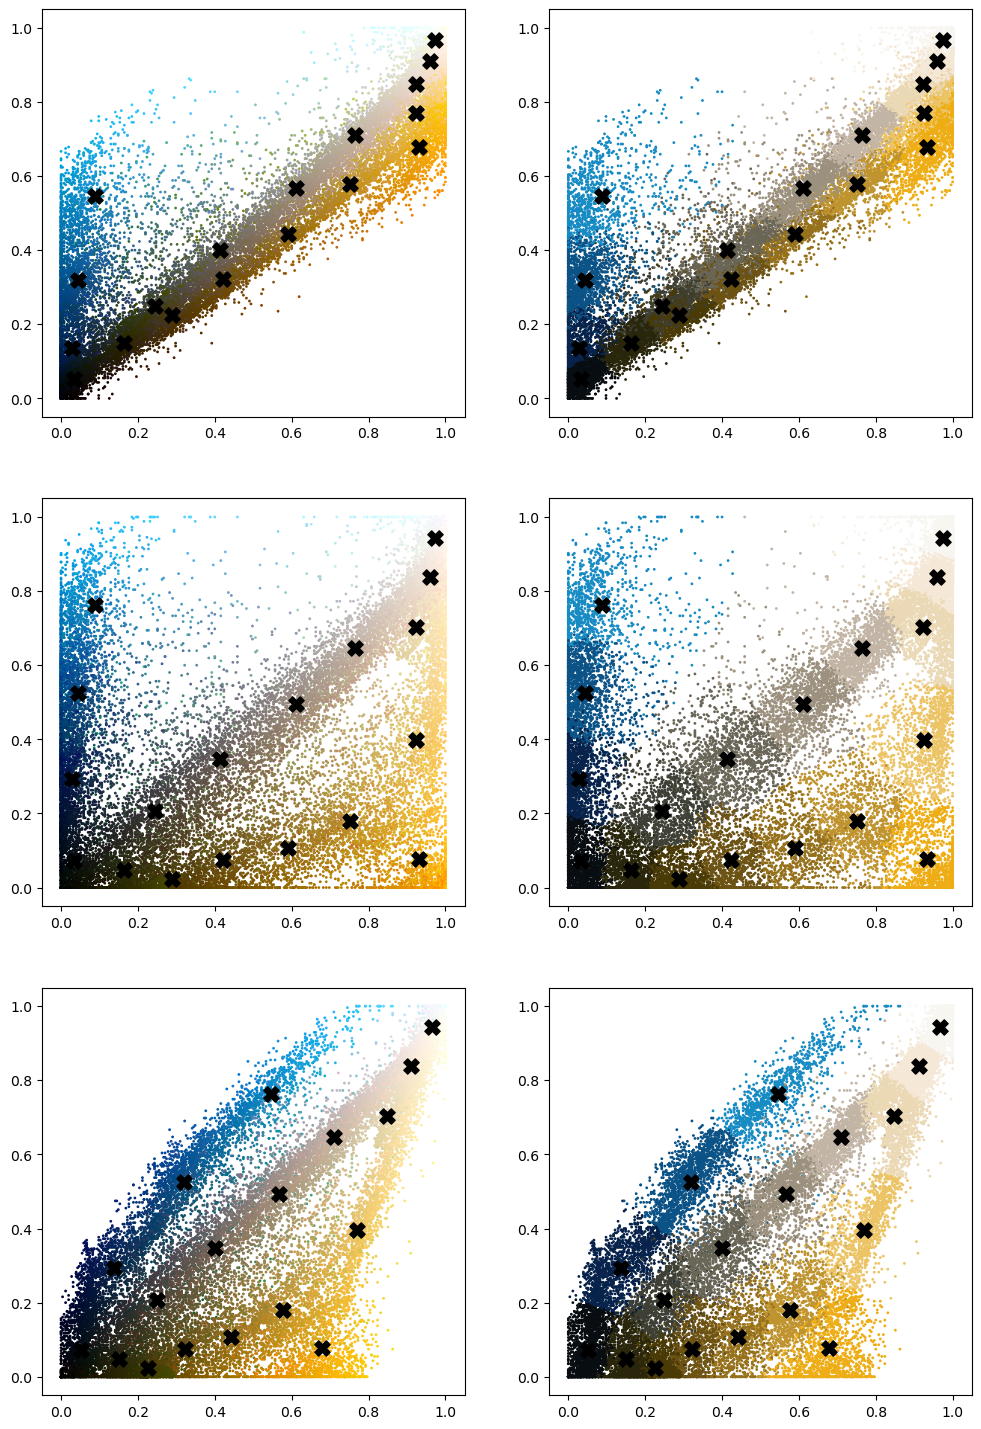

In [121]:
from matplotlib.colors import rgb2hex

nimg_data = np.transpose(image_data)
cimg_data = compressed_image_data / 255
cimg_data = cimg_data.reshape(image_data.shape)
ncen_data = np.transpose(centroids)
colors = []
compress_colors = []

for i in range(image_data.shape[0]):
    colors.append(rgb2hex(image_data[i]))

for i in range(image_data.shape[0]):
    compress_colors.append(rgb2hex(cimg_data[i]))
    
fig, axs = plt.subplots(3,2, figsize=(12, 18))

#ax.scatter(ncen_data[0],ncen_data[1],ncen_data[2],s=150,marker='X',c='black');
axs[0][0].scatter(nimg_data[0],nimg_data[1],s=1,c=colors);
axs[0][0].scatter(ncen_data[0],ncen_data[1],s=120,marker='X',c='black');
axs[0][1].scatter(nimg_data[0],nimg_data[1],s=1,c=compress_colors);
axs[0][1].scatter(ncen_data[0],ncen_data[1],s=120,marker='X',c='black');

axs[1][0].scatter(nimg_data[0],nimg_data[2],s=1,c=colors);
axs[1][0].scatter(ncen_data[0],ncen_data[2],s=120,marker='X',c='black');
axs[1][1].scatter(nimg_data[0],nimg_data[2],s=1,c=compress_colors);
axs[1][1].scatter(ncen_data[0],ncen_data[2],s=120,marker='X',c='black');

axs[2][0].scatter(nimg_data[1],nimg_data[2],s=1,c=colors);
axs[2][0].scatter(ncen_data[1],ncen_data[2],s=120,marker='X',c='black');
axs[2][1].scatter(nimg_data[1],nimg_data[2],s=1,c=compress_colors);
axs[2][1].scatter(ncen_data[1],ncen_data[2],s=120,marker='X',c='black');

plt.show()